In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
df = pd.read_csv("loan.csv")
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [7]:
# Handle missing values (if any)
df = df.dropna(subset=['ApplicantIncome', 'LoanAmount'])  
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             579 non-null    object 
 2   Married            590 non-null    object 
 3   Dependents         579 non-null    object 
 4   Education          592 non-null    object 
 5   Self_Employed      561 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   578 non-null    float64
 10  Credit_History     543 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.8+ KB
None


In [8]:
# Select relevant numerical features
X = df[['ApplicantIncome']].values 
y = df['LoanAmount'].values 

print(X[:5])
print(y[:5])


[[4583]
 [3000]
 [2583]
 [6000]
 [5417]]
[128.  66. 120. 141. 267.]


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

b1 = model.coef_[0]  
b0 = model.intercept_ 

print(f"b0 (Intercept): {b0:.4f}")
print(f"b1 (Slope): {b1:.4f}")


b0 (Intercept): 103.7029
b1 (Slope): 0.0082


In [10]:
# Predictions on training set
y_pred_train = model.predict(X_train)

sse = np.sum((y_train - y_pred_train) ** 2)
print(f"SSE (Sum of Squared Errors): {sse:.4f}")


SSE (Sum of Squared Errors): 2507795.6059


In [11]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")


RMSE (Root Mean Square Error): 72.8141


In [12]:
# Calculate R^2 score
r2 = r2_score(y_train, y_pred_train)
print(f"R² Score: {r2:.4f}")


R² Score: 0.3521


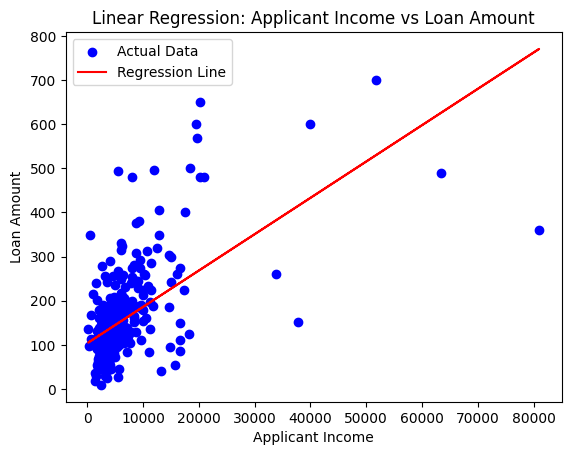

In [13]:
# Visualization: Actual vs Predicted
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_train, y_pred_train, color='red', label='Regression Line')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend()
plt.title("Linear Regression: Applicant Income vs Loan Amount")
plt.show()


In [17]:
# Predict loan amount for a new applicant income
new_income = np.array([[5000]])  # Example income
predicted_loan = model.predict(new_income)

print(f"Predicted Loan Amount for Applicant Income {new_income[0][0]}: {predicted_loan[0]:.4f}")


Predicted Loan Amount for Applicant Income 5000: 144.8899


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("wine.csv")
print(df.head())


   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [19]:
# Handle missing values (if any)
df = df.dropna() 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [20]:
# Select independent variables (features) and dependent variable (target)
X = df[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 
        'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD']]  # Independent variables
y = df['Proline']  # Dependent variable

# Display first 5 rows
print(X.head())
print(y.head())


   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  
0                  0.28     2.29       5.64  1.04  3.92  
1                  0.26     1.28       4.38  1.05  3.40  
2                  0.30     2.81       5.68  1.03  3.17  
3                  0.24     2.18       7.80  0.86  3.45  
4                  0.39     1.82       4.32  1.04  2.93  
0    1065
1    1050
2    1185
3    1480
4     735
Name: Proline, dtype: int64


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept (b0): {intercept:.4f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col} (b{i+1}): {coefficients[i]:.4f}")


Intercept (b0): -1416.1371
Coefficient for Alcohol (b1): 114.2732
Coefficient for Malic.acid (b2): -19.2223
Coefficient for Ash (b3): 237.9882
Coefficient for Acl (b4): -29.6222
Coefficient for Mg (b5): 2.9414
Coefficient for Phenols (b6): 13.2045
Coefficient for Flavanoids (b7): 18.8867
Coefficient for Nonflavanoid.phenols (b8): -64.1991
Coefficient for Proanth (b9): 4.2633
Coefficient for Color.int (b10): 26.3087
Coefficient for Hue (b11): 136.5582
Coefficient for OD (b12): 45.5504


In [22]:
# Predictions on training set
y_pred_train = model.predict(X_train)

print("First 5 Predicted Values:")
print(y_pred_train[:5])


First 5 Predicted Values:
[928.85135972 399.6169566  684.26076912 815.2738239  827.90048877]


In [23]:
# Calculate SSE
sse = np.sum((y_train - y_pred_train) ** 2)

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print(f"SSE (Sum of Squared Errors): {sse:.4f}")
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")


SSE (Sum of Squared Errors): 4771975.9940
RMSE (Root Mean Square Error): 183.3179


In [24]:
# Calculate R^2 score
r2 = r2_score(y_train, y_pred_train)

print(f"R² Score: {r2:.4f}")


R² Score: 0.6297


In [25]:
# Example input data (new observation)
new_input = np.array([[14.23, 1.71, 2.43, 15.6, 127, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92]]) 

predicted_proline = model.predict(new_input)

print(f"Predicted Proline for given input: {predicted_proline[0]:.4f}")


Predicted Proline for given input: 1222.3804


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
X = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']].values  
y = df['LoanAmount'].values 

In [28]:
# Handle missing values by dropping rows with NaN values
df = df.dropna(subset=['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'])

# Select independent variables (X) and dependent variable (Y)
X = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']].values  # Independent variables
y = df['LoanAmount'].values  # Dependent variable

print("\nData Preprocessing Done!")
print(f"Total records after preprocessing: {len(df)}")



Data Preprocessing Done!
Total records after preprocessing: 578


In [29]:
# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Splitting Completed!")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")



Data Splitting Completed!
Training set size: 462
Testing set size: 116


In [30]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

print("\nModel Coefficients:")
print(f"Intercept (b0): {intercept:.4f}")
print(f"Coefficients (b1, b2, b3): {coefficients}")



Model Coefficients:
Intercept (b0): 47.9209
Coefficients (b1, b2, b3): [0.00800954 0.00688344 0.13336752]


In [31]:
# Predicting loan amount for training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train[:5])


[123.30979235 150.99878141 158.66529757 121.2353208  142.73241352]


In [32]:
# Compute SSE (Sum of Squared Errors) and RMSE (Root Mean Square Error)
sse = np.sum((y_test - y_pred_test) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\nModel Evaluation:")
print(f"SSE (Sum of Squared Errors): {sse:.4f}")
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")



Model Evaluation:
SSE (Sum of Squared Errors): 399454.7797
RMSE (Root Mean Square Error): 58.6820


In [33]:
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred_test)

print(f"R-squared (R²): {r2:.4f}")


R-squared (R²): 0.5658


In [34]:
# Predict for a sample input
sample_input = np.array([[5000, 2000, 360]])  # Example: (ApplicantIncome=5000, CoapplicantIncome=2000, Loan_Amount_Term=360)
predicted_output = model.predict(sample_input)

print("\nPredicted Loan Amount for given input:", predicted_output[0])



Predicted Loan Amount for given input: 149.74776763329004
